In [24]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
# Read in Data and view it: this dataframe will be updated to a new complete one made in SQL
Cause_df = pd.read_csv("../raw_data/merge_tables_output.csv")
Cause_df.head()

,index,Entity,Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self
0,0,Afghanistan,AFG,1990,Under 5,431,808,10,776,21,0,0
1,1,Afghanistan,AFG,1991,Under 5,439,800,12,748,41,0,0
2,2,Afghanistan,AFG,1992,Under 5,486,863,13,777,51,0,0
3,3,Afghanistan,AFG,1993,Under 5,549,979,16,872,24,0,0
4,4,Afghanistan,AFG,1994,Under 5,589,1064,19,961,52,0,0


<AxesSubplot:>

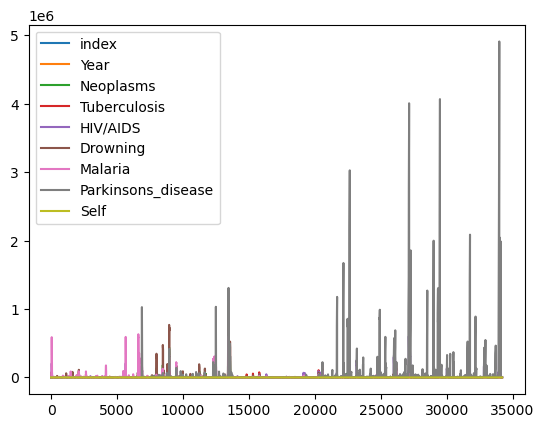

In [8]:
# Attempt to plot
Cause_df.plot()

In [9]:
# Encode Labels for SciKit Learn
le = LabelEncoder()
df2=Cause_df.copy()
df2["Entity"] = le.fit_transform(df2["Entity"])
df2["Code"] = le.fit_transform(df2["Code"])
# View Results (Bottom Half)
df2.tail()

,index,Entity,Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self
34195,6835,227,204,2015,70,226,44,2073,458,28,3488,0
34196,6836,227,204,2016,70,229,45,2027,454,26,3573,0
34197,6837,227,204,2017,70,230,45,1985,437,28,3654,0
34198,6838,227,204,2018,70,229,46,1952,416,28,3748,0
34199,6839,227,204,2019,70,222,47,1930,408,29,3843,0


In [10]:
# "Encode Age_Group to binary numbers"
df2_binary_encoded = pd.get_dummies(df2, columns=["Age_Group"])
df2_binary_encoded.head()


,index,Entity,Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5
0,0,0,0,1990,431,808,10,776,21,0,0,0,0,0,0,1
1,1,0,0,1991,439,800,12,748,41,0,0,0,0,0,0,1
2,2,0,0,1992,486,863,13,777,51,0,0,0,0,0,0,1
3,3,0,0,1993,549,979,16,872,24,0,0,0,0,0,0,1
4,4,0,0,1994,589,1064,19,961,52,0,0,0,0,0,0,1


In [11]:
# Begin Scaling Process
data_scaler = StandardScaler()
df2_scaled = data_scaler.fit_transform(df2_binary_encoded)
df2_scaled

array([[-1.7317976 , -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       [-1.73129115, -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       [-1.73078471, -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       ...,
       [ 1.73078471,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ],
       [ 1.73129115,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ],
       [ 1.7317976 ,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ]])

In [ ]:
# Verify Means and Standard Deviations of each Column
for loop in df2_scaled:
    for y in loop:
        print(np.mean(df2_scaled[:,]))
        print(np.std(df2_scaled[:,]))


    
    

In [12]:
#Double Check random Column Mean/STD
print(np.mean(df2_scaled[:,7]))
print(np.std(df2_scaled[:,7]))
    

-2.49313240617579e-18
1.0


In [13]:
# Create new Column showing the Highest Cause of Death Per Year Per Country
df2_binary_encoded['Max']=df2_binary_encoded[['Neoplasms','Tuberculosis','HIV/AIDS','Drowning','Malaria','Parkinsons_disease','Self']].apply(np.max,axis=1)
df2_binary_encoded.head()

,index,Entity,Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5,Max
0,0,0,0,1990,431,808,10,776,21,0,0,0,0,0,0,1,808
1,1,0,0,1991,439,800,12,748,41,0,0,0,0,0,0,1,800
2,2,0,0,1992,486,863,13,777,51,0,0,0,0,0,0,1,863
3,3,0,0,1993,549,979,16,872,24,0,0,0,0,0,0,1,979
4,4,0,0,1994,589,1064,19,961,52,0,0,0,0,0,0,1,1064


In [14]:
# Create X Variable Features Set (Max of Next Year)
X=df2_binary_encoded.copy()
X = X.drop("Max", axis=1)
X.head()

,index,Entity,Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5
0,0,0,0,1990,431,808,10,776,21,0,0,0,0,0,0,1
1,1,0,0,1991,439,800,12,748,41,0,0,0,0,0,0,1
2,2,0,0,1992,486,863,13,777,51,0,0,0,0,0,0,1
3,3,0,0,1993,549,979,16,872,24,0,0,0,0,0,0,1
4,4,0,0,1994,589,1064,19,961,52,0,0,0,0,0,0,1


In [15]:
# Define target
y = df2_binary_encoded["Max"].values
y[:5]

array([ 808,  800,  863,  979, 1064], dtype=int64)

In [16]:
# Split Data into Training/Testing Data and View Shapes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25650, 16)
(8550, 16)
(25650,)
(8550,)


In [17]:
# View data in a 80/20 Training/Testing split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(27360, 16)
(6840, 16)
(27360,)
(6840,)


In [18]:
# Create STandardScaler and Fit with Training Data
scaler=StandardScaler()
X_scaler = scaler.fit(X_train)

# Scale the Data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Create decision tree classifier
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)

# Fit model 
predictions = model.predict(X_test_scaled)

In [32]:
# View Model
predictions

array([ 53, 138,  40, ...,  20, 161,  34], dtype=int64)

In [34]:
#Confusion matrix ( Could not get Dataframe to work??)
import pandas as pd
cm = confusion_matrix(y_test, predictions)
cm

array([[241,   0,   0, ...,   0,   0,   0],
       [  0, 236,   0, ...,   0,   0,   0],
       [  0,   1, 124, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [37]:
# View Accuracy Scores
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.29368421052631577


In [38]:
# Print and View Classification Report
print(f"Accuracy score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy score : 0.29368421052631577
Classification Report


C:\Users\DrDan\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DrDan\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       236
           2       0.98      0.99      0.99       125
           3       0.97      0.96      0.96        68
           4       0.96      0.93      0.95        57
           5       0.94      0.94      0.94        48
           6       0.93      0.93      0.93        46
           7       0.71      0.82      0.76        33
           8       0.82      0.91      0.86        35
           9       0.91      0.96      0.94        54
          10       0.88      0.91      0.90        57
          11       0.93      0.80      0.86        35
          12       0.86      0.97      0.91        38
          13       0.57      0.74      0.64        23
          14       0.98      0.89      0.93        47
          15       0.89      0.83      0.86        29
          16       0.78      0.88      0.83        43
          17       0.96    

C:\Users\DrDan\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DrDan\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DrDan\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st